In [1]:
import numpy as np
import matplotlib.pyplot as plt
from animator import animate_Clusters
from DataSetGen import generate_cluster_data, load_fund_data_as_numpy
from ReinforcementClustering import reinforcement_clustering
import pickle

# For Clustering

In [2]:
# # Example synthetic data

# N = 100 # number of nodes
# K = 4 # number of clusters
# P = 0.1 # cluster varience

# X = generate_cluster_data(N, K, P, random_seed=1)


# For Funding Data

In [3]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# X = load_fund_data_as_numpy('StrategicMutualFunds.xlsx')
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)
# print(X_pca.shape)

# D_31.txt

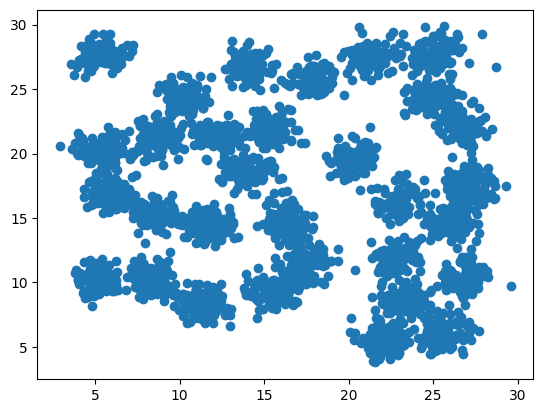

In [2]:
X = np.loadtxt("D31.txt")[:,:2]
plt.scatter(X[:,0],X[:,1])

In [6]:


K = 30
beta_min = 0.01
beta_max = 20
tau = 1.1


pi_star_list, Y_list = reinforcement_clustering(
    beta_min, beta_max, tau, K, X, episodes=50
)
Y_final = Y_list[-1]
pi_star = pi_star_list[-1]

Beta: 0.010
Beta: 0.011
Beta: 0.012
Beta: 0.013
Beta: 0.015
Beta: 0.016
Beta: 0.018
Beta: 0.019
Beta: 0.021
Beta: 0.024
Beta: 0.026
Beta: 0.029
Beta: 0.031
Beta: 0.035
Beta: 0.038
Beta: 0.042
Beta: 0.046
Beta: 0.051
Beta: 0.056
Beta: 0.061
Beta: 0.067
Beta: 0.074
Beta: 0.081
Beta: 0.090
Beta: 0.098
Beta: 0.108
Beta: 0.119
Beta: 0.131
Beta: 0.144
Beta: 0.159
Beta: 0.174
Beta: 0.192
Beta: 0.211
Beta: 0.232
Beta: 0.255
Beta: 0.281
Beta: 0.309
Beta: 0.340
Beta: 0.374
Beta: 0.411
Beta: 0.453
Beta: 0.498
Beta: 0.548
Beta: 0.602
Beta: 0.663
Beta: 0.729
Beta: 0.802
Beta: 0.882
Beta: 0.970
Beta: 1.067
Beta: 1.174
Beta: 1.291
Beta: 1.420
Beta: 1.562
Beta: 1.719
Beta: 1.891
Beta: 2.080
Beta: 2.288
Beta: 2.516
Beta: 2.768
Beta: 3.045
Beta: 3.349
Beta: 3.684
Beta: 4.053
Beta: 4.458
Beta: 4.904
Beta: 5.394
Beta: 5.933
Beta: 6.527
Beta: 7.180
Beta: 7.897
Beta: 8.687
Beta: 9.556
Beta: 10.512
Beta: 11.563
Beta: 12.719
Beta: 13.991
Beta: 15.390
Beta: 16.929
Beta: 18.622


# Plotting The Results

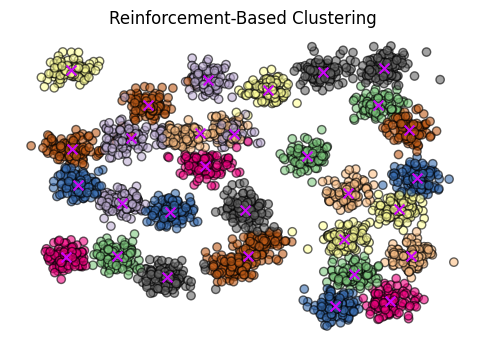

In [7]:
plt.figure(figsize=(6, 4), facecolor="#FFFFFF", edgecolor="#000000")
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=pi_star,
    cmap="Accent",
    marker="o",
    edgecolors="black",
    alpha=0.6,
    label="Data points",
)
plt.scatter(
    Y_final[:, 0], Y_final[:, 1], c="#ce04fb", marker="x", s=50, label="Centroids"
)
plt.title("Reinforcement-Based Clustering")
plt.axis("off")
plt.show()

# Save Data

In [ ]:
# with open('Y_list.pkl', 'wb') as f:
#     pickle.dump(Y_list, f)
# with open('pi_star_list.pkl', 'wb') as f:
#     pickle.dump(pi_star_list, f)

# Load Data

In [ ]:
with open('Y_list.pkl', 'rb') as f:
    Y_list = pickle.load(f)
with open('pi_star_list.pkl', 'rb') as f:
    pi_star_list = pickle.load(f)
    
    

In [4]:
animate_Clusters(X, Y_list, pi_star_list, interval=200)